# Graph Review

G=(V,E) where:

V = set of vertices

E = set of edges
- e = {V,W} unordered pairs (undirected)
 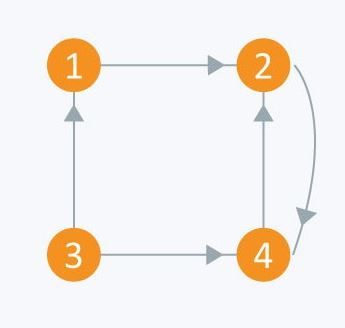
 V = {1,2,3,4}
 
 E = {{1,2},{1,4},...}
- e = (V,W) ordered pairs (directed)
 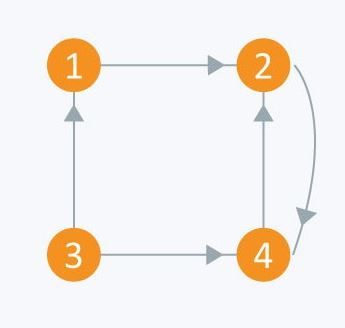
 V = {1,2,3,4}
 
 E = {(1,2),(2,4),(3,1),(3,4),(4,2)}
 
 If you wanted to find the neighboors of one vertex, you would have to go through the whole edge list, which is linear time. Instead, you want to use adjacency list.
 
## Applications
- Web crawling: finding links from pages you already have
- social networking: friend finder,friends that are close to you, or friends of friends
- network broadcast: send a packet out to which node
- garbage collection: almost every modern language has garbage collection. If there is some data structure that is not reachable, you can throw it away to save memeory. This is done through a BFS
- model checking: some fininte model of code, chip, circuit. you want to make sure that you can reach all the states, most people do that with a BFS
- checking mathematical conjectures: imagine a graph of all possible outputs of a theorems, we want to check them all to see if our theorom is correct
- solving puzzles and games: solving a 2x2 rubics cube. Solving the shortest route

## Pocket Cube (2x2x2)
Configuration graph
### Vertex: has a vertex for each possible configuration of the cube 
- # of verticies = 8!*3<sup>8</sup>)= 264,539,520. This makes sense because there are 8 cubeletts, and each cube has 3 faces that can be oriented in various ways
- divide this number by 24 because of symmetry
- divide by 3 because only a third of the cube is actually reachable if you cannot take the cube appart
- the number of vertices can also be defined by the number of faces, 24. The state of the cube will then be defined by a permutation of 24, with the solved solution being [0,1,2,3,...,21,22,23]
### Edge: for each possible move
- you can undo the your moves, therefore this graph will be UNDIRECTED

The diameter of this graph is 11. Diameter being the number of steps. 11 is the worst case, there can be a solution that is less than 11. Diameter is also known as God's Number. For 3x3x3, the diamter is 20. 

Fun Fact: an estimated order to solve a cube of nxnxn is O(n<sup>2</sup>/lg n)


# Graph Representation
## Adjacency list (Adj) (O(V+E)):
### Array version - use it for multiple graphs where we can use the vertices to talk to each other
- Adj[u] can be a hash table or array
- Each element in the array of vertices is a pointer to a linked list
- This linked list would be composed of the neighbour vertices
- Adj[u] = {vϵV|(u,v)ϵE} = set of all vertices v such that u,v is an edge
- Ex. Adj[3] = {1,4}, Adj[1] = {2}
### Object oriented version - cleaner and would mainly be used for only one graph
- v.neighbours = Adj[v]
### Implicit representation - where you would want to build the graph up to a point, ie rubics cube
- Adj(u) is a function
- v.neighbours() is a method

# Breadth First Search (BFS) or Depth  First Search (DFS)
- The difference between BFS and DFS is that DFS searches one node completely before moving to another while BFS searches the whole level before moving on
- BFS uses a queue while DFS uses a stack (first in, first out)

In [87]:
# Vertex Class

class Vertex:
    
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        
    def addNeighbor(self,nbr,weight):
        self.connectedTo[nbr] = weight
        
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getID(self):
        return self.id
    
    def getWeight(self,nbr):
        return self.connectedTo[nbr]
    
    def __str__(self):
        return str(self.id) + ' connected to: ' + str([x.id for x in self.connectedTo])

In [30]:
#Directed Graph

class Graph:
    
    def __init__(self):
        self.vertList = {} # this is a dictionary
        self.numVertices = 0
        
    def addVertex(self,key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def addEdge(self,f,t,cost=0): #f=from, t=to, cost=weight
        if f not in self.vertList:
            nv = self.addVertex(f)            
        if t not in self.vertList:
            nv = self.addVertex(t) 
        self.vertList[f].addNeighbor(self.vertList[t],cost)
        # how does addNeighbor get called 
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    
    def __contains__(self,n):
        return n in self.verList

In [2]:
g = Graph()

In [6]:
for i in range(6):
    g.addVertex(i)

In [7]:
g.vertList

{0: <__main__.Vertex at 0x4addc50>,
 1: <__main__.Vertex at 0x4addc88>,
 2: <__main__.Vertex at 0x4addcc0>,
 3: <__main__.Vertex at 0x4addcf8>,
 4: <__main__.Vertex at 0x4addd30>,
 5: <__main__.Vertex at 0x4addac8>}

In [8]:
g.addEdge(0,1,2)

In [29]:
for vertex in g:
    print (vertex)
    print (vertex.getConnections())
    print ('\n')

0 connected to: [1, 2]
dict_keys([<__main__.Vertex object at 0x0000000004ADDC88>, <__main__.Vertex object at 0x0000000004ADDCC0>])


1 connected to: []
dict_keys([])


2 connected to: [0]
dict_keys([<__main__.Vertex object at 0x0000000004ADDC50>])


3 connected to: []
dict_keys([])


4 connected to: []
dict_keys([])


5 connected to: []
dict_keys([])




In [26]:
g.addEdge(0,2,3)

In [28]:
g.addEdge(2,0,3)

# Word Ladder Problem

Keys: Labels on the buckets
Value: list of the words

In [32]:
def buildGraph(wordFile):
    d = {}
    g = Graph()
    
    wfile = open(wordFile,'r')
    
    #create buckts of words that differ by one letter
    for line in wfile:
        print (line)
        word = line[:-1]
        print (word)
        
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i +1:]
            
            if bucket in d:
                d[buckt].append(word)
            else:
                d[bucket] = [word]
                
        # add vertices and edges for words in the same bucket
        for bucekt in d.keys():
            for word1 in d[bucket]:
                for word2 in d[bucket]:
                    if word1 != word2:
                        g.addEdge(word1,word2)
        return g

# Breadth First Search (BFS)
How can we find the shortest solution to the word ladder problem?

- Visit all nodes reachable from given sϵV
- O(V+E)
- look at nodes reachable in 0 moves {s}, 1 move (Adj[s]), 2 moves...
- carful to avoid duplicates (previous states) or else we run into an infinite loop


In [43]:
def BFS(s, Adj):
    level = {s:0} 
    parent = {s: None}   
    i = 1
    frontier = [s] #all the things that can be reached in i-1 moves
    
    while frontier:        
        nextlayer = [] #all the things that can be reached in i moves
        for u in frontier:
            for v in Adj[u]:
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    nextlayer.append(v)
        frontier = next
    i += 1

## Shortest Paths
-  V <- parent[v]
     <- parenth[parent[v]]
     <- ...
     <- s
- is a shortest path from s to v
- shortest path means that you use the fewest edges level[v]

The runtime for this algorithm is 2x|E| (the handshaking lemma) for undirected graphs, or |E| for directed graphs

In [44]:
# another way of visualizing BFS

def bfs2(g, start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.endqueue(start)
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            nbr.setColor('gray')
            nbr.setDistance(currentVert.getDistance()+1)
            nbr.setPred(currentVert)
            vertQueue.enqueue(nbr)
        currentVert.setColor('black')       

# Depth First Search
Uses include:
- Edge Classification
- Cycle Detection
- Topoligcal Sort

Recursively explore the graph, and back track as necessary (kind of like how you would solve a maze) 

Careful to not repeat vertices

In [95]:
s = None
parent = {s:None}
#DFS_Visit just looks at the graph from s, meaning it may or may not be the whole graph
def DFS_Visit(V,Adj,s): #s is the source vertex
    for v in Adj[s]:
        if v not in partn:
            parent[v]=s
            dfs_Visit(v,Adj,v)
#This algorithm is looking at all the possible places you may start the search and trying them all. 
#It is particularly useful when the whole graph is not as connected
def DFS(V,Adj):
    parent = {}
    for s in V:
        if s not in parent:
            parent[s]=None
            DFS_Visit(V,Adj,s)

## Run Time
Linear time, O(V+E), just like BFS
- visit each vertex once in DFS alone; O(V)
- DFS_Visit called once per vertex v
    - pay length of Adj[v]
- Therefore O(∑|Adj[V]) = O(E) -> Handshake Lemma

## Edge Classification
In a directed graph, every edge gets visited once, in an undirected graph, it is visited twice (one from each side). A - Tree edge (Parent Pointer) is when you visit a new vertex via that edge
- Forward Edge:from a node to a decendent in the forest
- Backward Edge: from a node to an ancestor in the forst
- Cross Edge: goes from one tree to another, between non-ancestor related subtrees

Note:
- You can never have a forward edge in an undirected edge. Instead, it is a backwards edge
- Directed graphs will have tree and cross edges, while undirected will have tree edges

### Edge classification is important for cycle detection . Particularly in directed graphs.
G has a cycle if and only if DFS has a back edge

### Topological Sort: Job Scheduling
Given a directed acyclic graph (DAG). Order vertices so that all edges point from lower order to higher order. For any edge e=(u,v), v finishes before u funishes

#### Case 1: I starts before V
#### Case 2: Starts before U

# Knight's Tour Problem (example on why we would want a Depth First Search)
The object of the puzzle is to find a sequence of moves that allow the knight to visit every square on the board exactly once
- you can solve the problem using two main steps:
    - Represent the legal moves of a knight on a chessboard as a graph
    - use a graph algorithm to find a path of length rows x columns-1 where every vertex on the graph is visited exactly once
    


In [54]:
#bdSize is the board size... 8

def knightGraph(bdSize):
    ktGraph = Graph()
    for row in range(bdSize):
        nodeID = posToNodeId(row,col,bdSize)
        newPositions = genLegalMoves(row,col,bdsize)
        for e in newPositions:
            nid = posToNodeId(e[0],e[1],bdSize)
            ktGraph.addEdge(nodeId,nid)
    return ktGraph

def posToNodeId(row,column,board_size):
    return(row*board_size) + column #converts the position into a vertex number

def genLegalMoves(x,n,bdSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   (1,-2),(1,2),(2,-1),(2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = x + i[1]
        if legalCoord(newX,bdSize) and \
                    legalCoord(newY,bdSize):
                    #this backslash just tells python to continue this line even though it is on a new line
            newMoves.append((newX,newY))
    return newMoves

def legalCoord(x,bdSize):
    if x >= 0 and x < bdSize:
        return True
    else:
        return False

In [55]:
def knightTour(n,path,u,limit):
        u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = list(u.getConnections())
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if nbrList[i].getColor() == 'white':
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                u.setColor('white')
        else:
            done = True
        return done

# Implementing a Graph Overview

In [59]:
from enum import Enum
from collections import OrderedDict

class State(Enum):
    unvisited = 1
    visited = 2
    visiting = 3
    
class Node:
    
    def __init__(self,num):
        self.num=num
        self.visit_state = State.unvisited  #we can now track if the item has bee visited or not
        self.adjacent = OrderedDict()       # key = node, value = weight
        
    def __str__(self):
        return str(self.num)
        
class Graph:
    
    def __init__(self):
        self.nodes = OrderedDict()
        
    def add_node(self,num):
        node = Node(num)
        self.nodes[num] = node
        return node
    
    def add_edge(self,source,dest,weight=0): # Adjacency list
        if source not in self.nodes:
            self.add_node(source)
        if dest not in self.nodes:
            self.add_node(dest)
            
        self.nodes[source].adjacent[self.nodes[dest]] = weight

In [60]:
g = Graph()

In [61]:
g.add_edge(0,1,5)

In [62]:
g.nodes

OrderedDict([(0, <__main__.Node at 0x4f65908>),
             (1, <__main__.Node at 0x4f658d0>)])

In [63]:
g.add_edge(1,2,3)

In [64]:
g.nodes

OrderedDict([(0, <__main__.Node at 0x4f65908>),
             (1, <__main__.Node at 0x4f658d0>),
             (2, <__main__.Node at 0x4f65e80>)])

In [66]:
g.nodes

OrderedDict([(0, <__main__.Node at 0x4f65908>),
             (1, <__main__.Node at 0x4f658d0>),
             (2, <__main__.Node at 0x4f65e80>)])

# Implementation of a Depth First Search

In [82]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [155]:
def dfs(graph,start):
    visited = set()
    stack = [start]
    
    while stack:
        vertex = stack.pop()
        
        if vertex not in visited:
            visited.add(vertex)
            added_part = graph[vertex] - visited
            stack.extend(added_part) #set(['B', 'C'] - set('B') = set('C')
                    
    return visited #Return automatically sorts the vertexes, print would return the list unsorted

dfs(graph,'E')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [156]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]

    while stack:
        (vertex, path) = stack.pop() #stores the start in vertex and [start] in path
        for nxt in graph[vertex] - set(path):
            
            #print(nxt)
            #print(graph[vertex])
            
            #print(path)
            #print(graph[vertex]-set(path))            
            
            if nxt == goal:

                yield path + [nxt]
                
            else:
                stack.append((nxt, path + [nxt]))

list(dfs_paths(graph, 'C', 'F'))

['C']
['C']
['C', 'A']
['C', 'A', 'B']
['C', 'A', 'B']
['C', 'A', 'B', 'E']


[['C', 'F'], ['C', 'A', 'B', 'E', 'F']]

In [141]:
def bfs(graph,start):
    visited = set()
    queue = [start]
    
    while queue:
        vertex =queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex]-visited)
            
    return visited
bfs(graph,"D")

{'A', 'B', 'C', 'D', 'E', 'F'}

 # Single Source Shortest Paths Problem (Considering Weights)
 Motivation:
 - G(V,E,W), where Graph(Vertices, Edges, Weights)
 - Two Algorithms
     - Dijkstra: non-negative edges with a complexity of O(V LnV + E), which is practically linear time. E=O(v<sup>2</sup>)
     - Bellmen-Ford: for -/+ edges, with O(VE)=O(v<sup>3</sup>). So when you can, Dijkstra is much faster.
     
 - These two algorithms are independent of weight
 - You can sometimes change a graph from a +/-ve to just +ve by making the base case +ve. A -ve weighting can be used in social networks, tolls
     
- Path p = <Vo,V1,Vk> where (Vi,Vi+1)ϵE for 0 ≤ i ≤ k
- W(p) = ∑w(vi,vi+1)

Therefore the shortest path should have the lowest weight (need to watch out for -ve weights)

## Negative Cycles
You can get stuck in an infinite loop where your loop path is -6, +2, +3, and you will continue to loop through and net -1 each loop. The algorithm needs to be able to identify negative cycles so that the route will not be - infinity (indeterminate)

## General Structure (no negative cycles)
- Initialize for u ϵ V, d[v] = infinity, π[u] = NIL (π is the predecessor)
- d[s] = 0
- repeat select edge (u,v) [somehow]
- "Relax" edge(u,v), or "Relaxation" is when you update a value with another one that provides a shorter path. An anology is with an initial over estimate of path being a tension spring in tension. As the path is shortened, the tension spring is "relaxed"
    - if d[v] > d[u] + w(u,v):
    
        d[v] = d[u] + w(u,v)
        
        π[v] = u
